In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


In [3]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")


In [4]:
# Create a customer-level aggregation
customer_agg = merged_data.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    total_transactions=("TransactionID", "count"),
    avg_transaction_value=("TotalValue", "mean"),
    region=("Region", "first")  # Use the first occurrence for region
)

In [5]:
# Encode the 'region' column
customer_agg["region"] = customer_agg["region"].astype("category").cat.codes

In [6]:
# Step 4: Data Normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_agg)


In [7]:
# Step 5: K-Means Clustering
# Test different numbers of clusters (e.g., 2 to 10)
db_scores = []
k_values = range(2, 11)

In [8]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, cluster_labels)
    db_scores.append(db_index)

C:\Users\aqsar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aqsar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aqsar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aqsar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

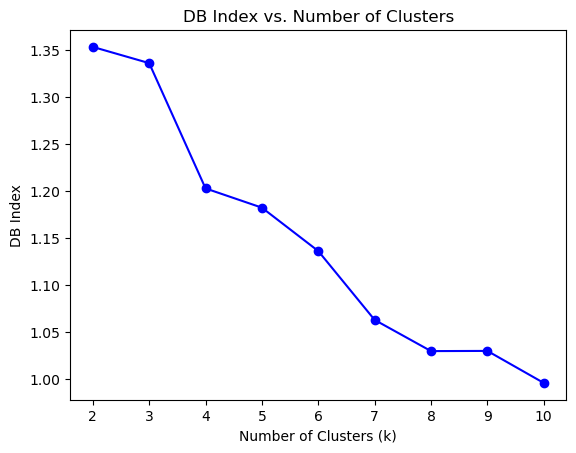

In [9]:
# Plot the DB Index for different numbers of clusters
plt.plot(k_values, db_scores, marker="o", color="blue")
plt.title("DB Index vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("DB Index")
plt.show()


In [10]:
# Choose the optimal number of clusters (minimum DB Index)
optimal_k = k_values[np.argmin(db_scores)]
print(f"Optimal Number of Clusters: {optimal_k}")


Optimal Number of Clusters: 10


In [11]:
# Perform final clustering with the optimal number of clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
customer_agg["cluster"] = kmeans_final.fit_predict(scaled_features)

C:\Users\aqsar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


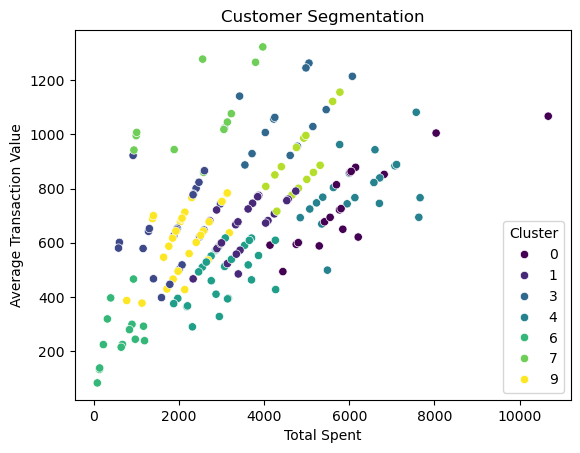

In [12]:
# Step 6: Cluster Visualization
sns.scatterplot(
    x=customer_agg["total_spent"],
    y=customer_agg["avg_transaction_value"],
    hue=customer_agg["cluster"],
    palette="viridis"
)
plt.title("Customer Segmentation")
plt.xlabel("Total Spent")
plt.ylabel("Average Transaction Value")
plt.legend(title="Cluster")
plt.show()


In [13]:
# Step 7: Save Results
customer_agg.to_csv("FirstName_LastName_Clustering.csv", index=True)
print("Clustering results saved to 'FirstName_LastName_Clustering.csv'.")


Clustering results saved to 'FirstName_LastName_Clustering.csv'.


In [14]:
final_db_index = davies_bouldin_score(scaled_features, customer_agg["cluster"])
print(f"Davies-Bouldin Index for Final Clustering: {final_db_index}")

Davies-Bouldin Index for Final Clustering: 0.9957526812503525
